In [1]:
from sklearn import datasets
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
random.seed(13)

In [2]:
X, y = datasets.make_blobs(n_samples=1000,n_features=2,
                           centers=3,cluster_std=0.38,
                           random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                test_size=0.33, random_state=42)

In [3]:
def one_hot(a):
  b = np.zeros((a.size, a.max()+1))
  b[np.arange(a.size), a] = 1
  return b

def cast_matrix(test_matrix, data_type):
    return list(map(lambda sub: list(map(data_type, sub)), test_matrix))

In [4]:
m, n = X_train.shape
a=np.empty(m); a.fill(1)
x_tr = np.concatenate((a.reshape(-1, 1), X_train), axis=1)

p, q = X_test.shape
a=np.empty(p); a.fill(1)
x_te = np.concatenate((a.reshape(-1, 1), X_test), axis=1)


y_tr = one_hot(y_train)
y_tr = cast_matrix(y_tr, int)
y_tr = np.array(y_tr)

y_te = one_hot(y_test)
y_te = cast_matrix(y_te, int)
y_te = np.array(y_te)

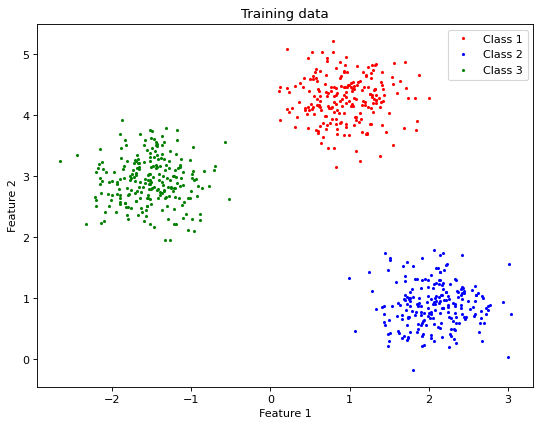

In [5]:
fig = plt.figure(figsize=(8,6), dpi = 80)
plt.plot(X_train[:, 0][y_train == 0], X_train[:, 1][y_train == 0], 'rp', markersize = 2, label = 'Class 1')
plt.plot(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], 'bp', markersize = 2, label = 'Class 2')
plt.plot(X_train[:, 0][y_train == 2], X_train[:, 1][y_train == 2], 'gp', markersize = 2, label = 'Class 3')
plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title('Training data')
plt.show()

In [6]:
def activation(z):
  a = np.zeros((1,3), dtype=int)
  idx=np.argmax(z)
  a[0][idx]= 1
  return a[0]

def mc_perceptron(xtr, ytr, epochs):
  m,n = xtr.shape
  n_miss_list = []
  theta = np.random.random((3, 3))
  theta_batch = np.zeros((3, 3))
  for epoch in range(epochs):
    n_miss = 0
    for idx, x_i in enumerate(xtr):
      u = np.dot(x_i,theta)
      pre = np.array(activation(u))
      comparison = pre == ytr[idx]
      if( comparison.all()) == False:
        n_miss += 1
        act = np.where(ytr[idx] > 0)
        pr  = np.where(pre > 0)
        theta_batch[act] += x_i
        theta_batch[pr] -= x_i
    theta = theta_batch/m
    n_miss_list.append(n_miss)
  return theta, n_miss_list

In [7]:
weights, miss_l = mc_perceptron(x_tr, y_tr, 50)
weights

array([[-0.07014925, -0.22380411,  0.7430536 ],
       [ 0.34477612,  1.70545726, -0.158463  ],
       [-0.27462687, -1.48165315, -0.5845906 ]])

In [8]:
x_i = np.insert(X_test[10], 0, 1).reshape(-1,1)
np.dot(weights, x_i)

array([[ 2.93458374],
       [ 0.88942533],
       [-3.82400908]])

In [9]:
y_pred = []
for idx, x_i in enumerate(x_te):
  u = np.dot(x_i,weights)
  y_pred.append(activation(u))
y_pred = np.array(y_pred)

y_pre = []
p, q = y_te.shape
for j in range(p):
  y_pre.append((np.where(y_pred[j] > 0))[0][0])
y_pre = np.array(y_pre)

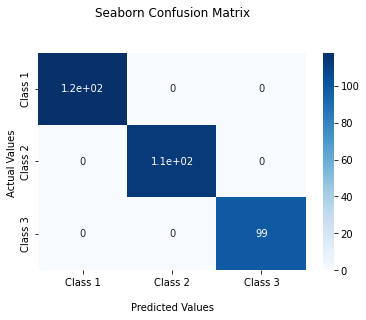

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pre)
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['Class 1','Class 2', 'Class 3'])
ax.yaxis.set_ticklabels(['Class 1','Class 2', 'Class 3'])

plt.show()

In [11]:
from sklearn import metrics
print('Performance Report (Accuracy score on test set) :', format(metrics.accuracy_score(y_test, y_pre), '.2f'),'\n\n')
target=[str(i) for i in range(3)]
print('Classification Report'.center(65,'-'),'\n', metrics.classification_report(y_test, y_pre,target_names=target))

Performance Report (Accuracy score on test set) : 1.00 


----------------------Classification Report---------------------- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00       113
           2       1.00      1.00      1.00        99

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330

